In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os

sys.path.append(os.path.join('..'))

from counting_boats.utils import area_coverage

In [6]:
%cd C:\\ML_Software\\results
coverage = pd.read_csv('coverage.csv')

reference_gon = "C:\\ML_Software\\data\\polygons\\moreton.geojson"

def date_2_udm(date):
    y, m, d = date.split('-')
    fsdate = f"{y}{m}{d}"
    udm = [f for f in os.listdir("UDM") if fsdate in f][0]
    return os.path.join("UDM", udm)

print(coverage.head())
coverage = coverage[coverage['date'] == '2016-04-08']
print(coverage)

for i in range(0, len(coverage)):
    row = coverage.iloc[i]
    poly = row['polygon']
    coverage_n = area_coverage.area_coverage_poly(reference=reference_gon, polygon=poly)
    # put the coverage in the coverage column
    udm = date_2_udm(row["date"])
    cloud_cover, _ = area_coverage.cloud_coverage_udm(udm)
    coverage.iloc[i, coverage.columns.get_loc('area_coverage')] = coverage_n
    coverage.iloc[i, coverage.columns.get_loc('cloud_coverage')] = cloud_cover
    print(row["date"], coverage_n, cloud_cover)

# save the coverage csv again
# coverage.to_csv('coverage.csv', index=False)


C:\ML_Software\results
         date      aoi  area_coverage  cloud_coverage  \
0  2016-11-14  moreton       0.360088        0.127545   
1  2016-11-19  moreton       0.391561        0.060773   
2  2016-11-22  moreton       0.397779        0.169502   
3  2016-11-24  moreton       0.195641        0.407796   
4  2016-11-27  moreton       0.082084        0.089100   

                                             polygon   x   y  
0  {"coordinates": [[[[153.27767109475505, -27.47... NaN NaN  
1  {"coordinates": [[[[153.28493144845515, -27.57... NaN NaN  
2  {"coordinates": [[[[153.3145353352776, -27.583... NaN NaN  
3  {"coordinates": [[[[153.304901602076, -27.5736... NaN NaN  
4  {"coordinates": [[[[153.08783650931903, -27.35... NaN NaN  
Empty DataFrame
Columns: [date, aoi, area_coverage, cloud_coverage, polygon, x, y]
Index: []


[]


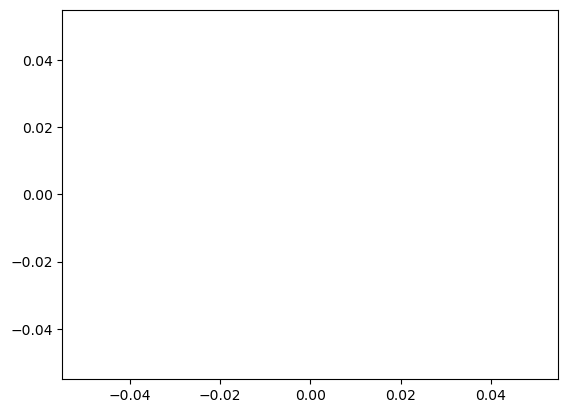

In [7]:
all_cov = coverage['area_coverage'].values
print(all_cov)
fig = plt.figure()  
plt.plot(all_cov)
plt.show()


Empty DataFrame
Columns: [date, class, images, latitude, longitude, confidence, w, h, aoi]
Index: []


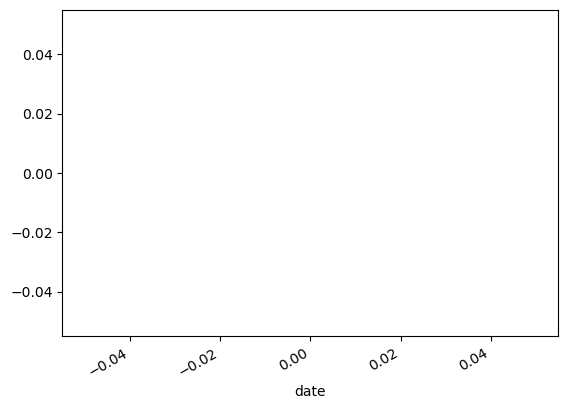

In [8]:
detections = pd.read_csv("C:\\ML_Software\\results\\boat_detections.csv")
detections["date"] = pd.to_datetime(detections["date"], dayfirst=True)
coverage = pd.read_csv("C:\\ML_Software\\results\\coverage.csv")
coverage["date"] = pd.to_datetime(coverage["date"])

over50 = detections[detections["date"].isin(coverage[coverage["area_coverage"] > 0.2]["date"])]
print(over50.head())

# plot count of rows per date
over50["date"].value_counts().sort_index().plot()
plt.show()